<div >
<img src = "figs/ans_banner_1920x200.png" />
</div>

# Caso-taller:  Segmentación de Clientes con Clustering Jerárquico y DBSCAN

El objetivo de este caso-taller es analizar una base de datos ficticia sobre clientes de una tienda y buscar encontrar grupos de clientes que permitan generar estrategias de marketing focalizadas. La base se encuentra en los `Archivos de Laboratorio` en la carpeta `data` y cuenta con 200 observaciones y 5 variables:

- `Id_Cliente`: identificador de cliente.
- `Genero`: género del cliente: Mujer, Hombre
- `Edad`: edad en años
- `Ingreso`: ingresos anuales
- `Puntaje_Gasto`: es una variable que mide cuán a menudo un cliente compra en la tienda, siendo 100 el puntaje más alto.


## Instrucciones generales

1. Para desarrollar el *cuaderno* primero debe descargarlo.

2. Para responder cada inciso deberá utilizar el espacio debidamente especificado.

3. La actividad será calificada sólo si sube el *cuaderno* de jupyter notebook con extensión `.ipynb` en la actividad designada como "entrega calificada por el personal".

4. El archivo entregado debe poder ser ejecutado localmente por el tutor. Sea cuidadoso con la especificación de la ubicación de los archivos de soporte, guarde la carpeta de datos en el mismo `path` de su cuaderno, por ejemplo: `data`.

## Desarrollo


### 1.Carga de datos 

En la carpeta `data` se encuentra el archivo `datos_clientes.csv` cargue estos datos en su *cuaderno*. 

In [241]:
# Importar las librerías
import pandas as pd
import numpy as np

# leer los datos
clientes = pd.read_csv('data/datos_clientes.csv', sep = ',')

# Ver las primeras observaciones
clientes.head()

,Id_Cliente,Genero,Edad,Ingreso,Puntaje_Gasto
0,1,Mujer,41,98115.05,39
1,2,Mujer,20,35458.14,75
2,3,Mujer,68,59872.08,55
3,4,Hombre,63,48508.93,51
4,5,Mujer,31,44431.11,54


#### **Procedimiento carga de datos**

* Se importan las librerias necesarias, en este caso se incia cargando pandas
* Se crea un dataframe con los datos leidos del archivo `datos_clientes.csv`
* El archivo con los datos se encuentra guardado en una carpeta llamada `data` alojada en el mismo PATH del cuaderno.
* Se muestran los primeros registros del dataframe con la función `head`

A continuación se describen las variables con las que cuenta el dataframe
- `Id_Cliente`: identificador de cliente, hace las veces de indice.
- `Genero`: género del cliente: Mujer, Hombre
- `Edad`: edad en años
- `Ingreso`: ingresos anuales
- `Puntaje_Gasto`: es una variable que mide cuán a menudo un cliente compra en la tienda, siendo 100 el puntaje más alto.

### 2. Análisis preliminar. 

Antes de comenzar el análisis de segmentación utilice estadísticas descriptivas para explorar la variables que se encuentran en los datos. En su análisis mencione si hay patrones que surgen del examen descriptivo de los datos; entre ellos si hay diferencias en los ingresos y los puntajes de gastos para mujeres y hombres, por grupos etarios (18-24, 25-34, 35-44, 45-54, 55-64, y 65+), y por grupos etarios y género. Discuta además si estas diferencias son estadísticamente significativas.

In [242]:
# Mostrar estadisticas básicas del conjunto de datos
clientes.describe().T

,count,mean,std,min,25%,50%,75%,max
Id_Cliente,200.0,100.5000,57.879185,1.00,50.7500,100.50,150.250,200.00
Edad,200.0,38.8500,13.969007,18.00,28.7500,36.00,49.000,70.00
Ingreso,200.0,60624.4466,26262.903416,13458.02,41512.7875,60777.96,77143.865,138584.52
Puntaje_Gasto,200.0,50.2000,25.823522,1.00,34.7500,50.00,73.000,99.00


#### **Procedimiento estadisticas básicas**

Se muestran las estadisticas básicas del conjunto de datos numéricos usando la función `Describe` transpuesta.

#### **Analisis de estadisticas básicas**
* Se cuenta con 200 registros y el dataframe no tiene datos faltantes
* La variable `edad` tiene una media de 38.8; la edad minima es de 18 años y la maxima es de 70 años.
* La variable `ingreso` tiene minimo en 13458; maximo en 138584.5 y media de 60624, lo que la hace tener una escala significativamente mayor a las de las otras variables, esto es un punto que debe tenerse en cuenta a la hora de calcular las distancias ya que esta diferencia tan grande hará que las magnitudes de las distancias estén dominadas por esta variable haciendo despreciable la información que puedan aportar las otras variables.
* La variable `Puntaje_gasto` tiene media 50.2 y minimo y maximo en 1 y 99.

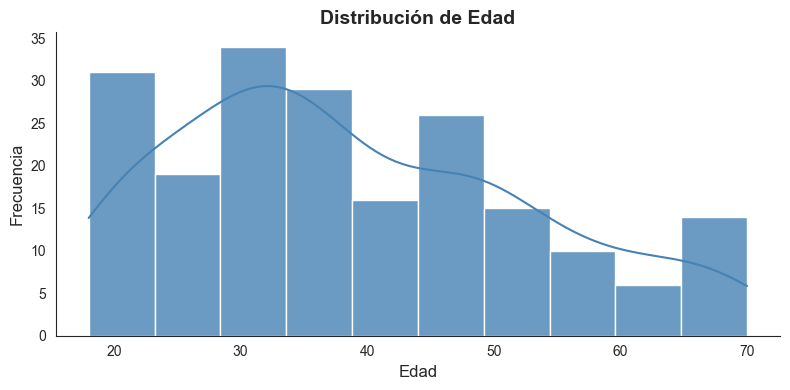

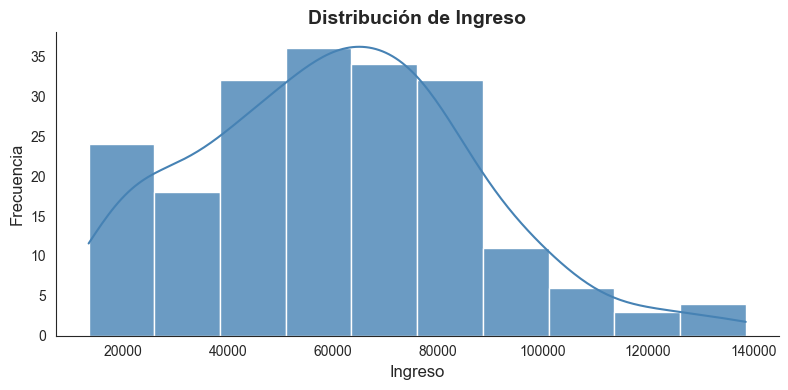

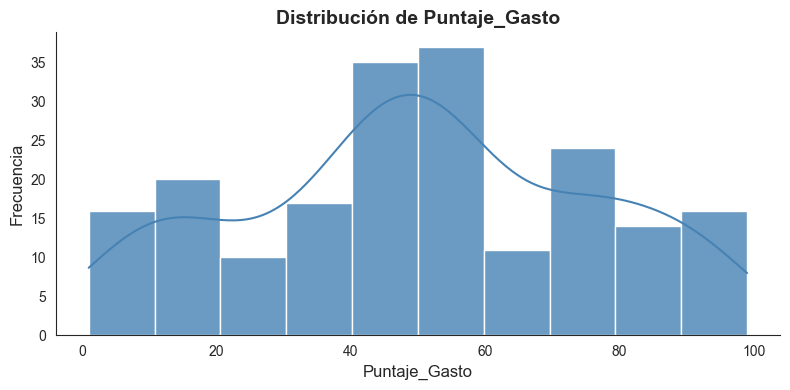

In [243]:
# Histogramas de las variables numéricas
import matplotlib.pyplot as plt
import seaborn as sns

# Definir estilo general
sns.set_style("white")
sns.set_palette("crest")  # paleta suave

col_numericas = ['Edad', 'Ingreso', 'Puntaje_Gasto']

for col in col_numericas:
    plt.figure(figsize=(8, 4))
    sns.histplot(
        data=clientes, 
        x=col, 
        bins=10, 
        kde=True, 
        color="steelblue", 
        edgecolor="white", 
        alpha=0.8
    )
    
    plt.title(f'Distribución de {col}', fontsize=14, fontweight="bold")
    plt.xlabel(col, fontsize=12)
    plt.ylabel("Frecuencia", fontsize=12)
    
    sns.despine()  # elimina bordes superiores y derechos
    plt.tight_layout()
    plt.show()

#### **Procedimiento Histrogramas**

* Se define el estilo general para los graficos
* Se crea una lista con los nombres de las columnas numericas del dataframe
* Se itera sobre cada una de las columnas numericas con el objetivo de generar un histograma de cada variable numerica.
* Se activa el parametro kde para generar una estimación de la función de densidad de probabilidad

#### **Analisis Histogramas**
Estos gráficos permiten identificar la distribución de los datos, posibles sesgos y concentraciones en determinados rangos.

**Distribución de Edad**

La variable **Edad** muestra una distribución relativamente amplia entre los 18 y 70 años.  
- Se observa una concentración importante de clientes en los rangos de **20 a 40 años**.  
- A partir de los **50 años**, la frecuencia de clientes disminuye progresivamente.  
- Esto sugiere que la base de clientes está más orientada hacia adultos jóvenes y de mediana edad.

**Distribución de Ingreso**

La variable **Ingreso** presenta una distribución **asimétrica a la derecha (sesgo positivo)**:  
- La mayoría de clientes se concentran en ingresos entre **40,000 y 80,000**.  
- Existe una cola larga hacia ingresos más altos, lo que indica que hay pocos clientes con ingresos muy elevados (valores atípicos en el extremo derecho).  
- Esto refleja una población donde la mayoría tiene ingresos medios, con algunos casos puntuales de ingresos altos.

**Distribución de Puntaje de Gasto**

El **Puntaje de Gasto** presenta una distribución más **equilibrada**, aunque con cierta concentración en el rango **40 a 60 puntos**.  
- Los clientes con puntajes muy bajos (<20) o muy altos (>80) son menos frecuentes.  
- La forma de la distribución sugiere que la mayoría de clientes tienen hábitos de gasto en un nivel medio.  

#### **Conclusiones Histogramas**
- La **Edad** está concentrada en adultos jóvenes, lo que puede influir en patrones de consumo.  
- El **Ingreso** presenta una clara asimetría, con la mayoría en un rango medio y pocos clientes con ingresos extremos.  
- El **Puntaje de Gasto** refleja un comportamiento de consumo centrado en niveles intermedios, con pocos clientes en los extremos.  

Estos hallazgos son útiles para segmentar la base de clientes y diseñar estrategias diferenciadas de marketing o fidelización.


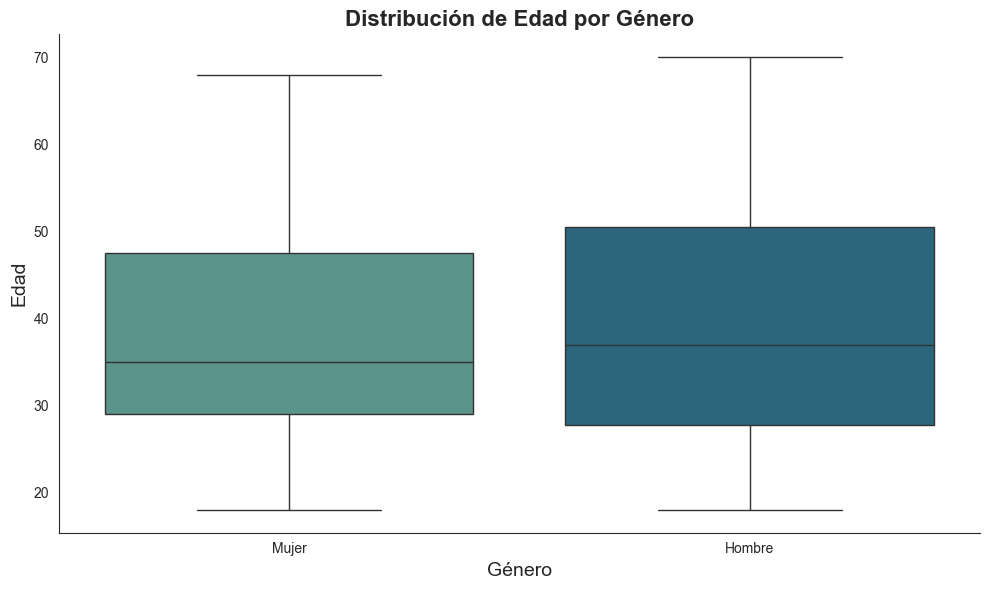

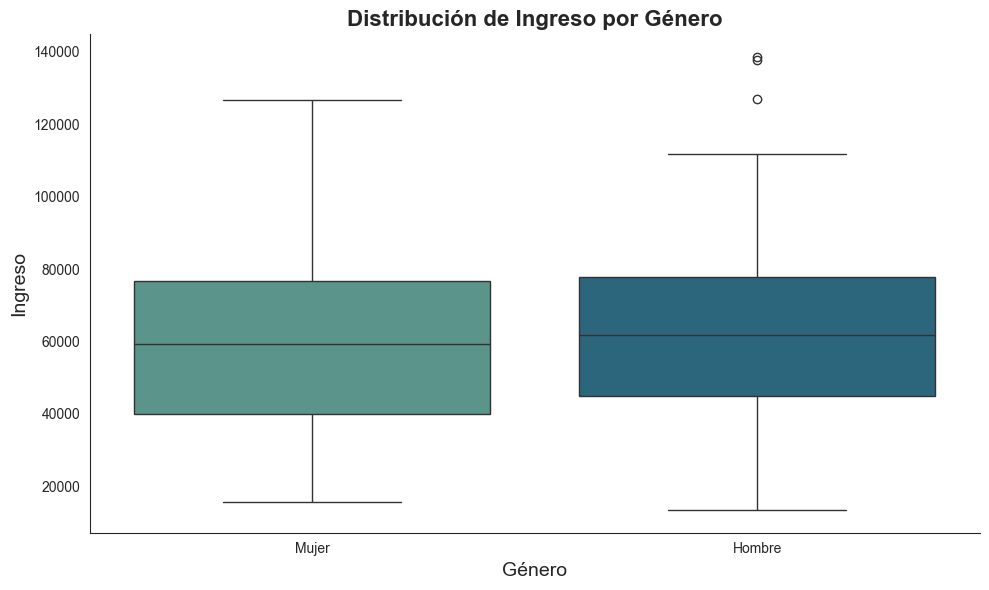

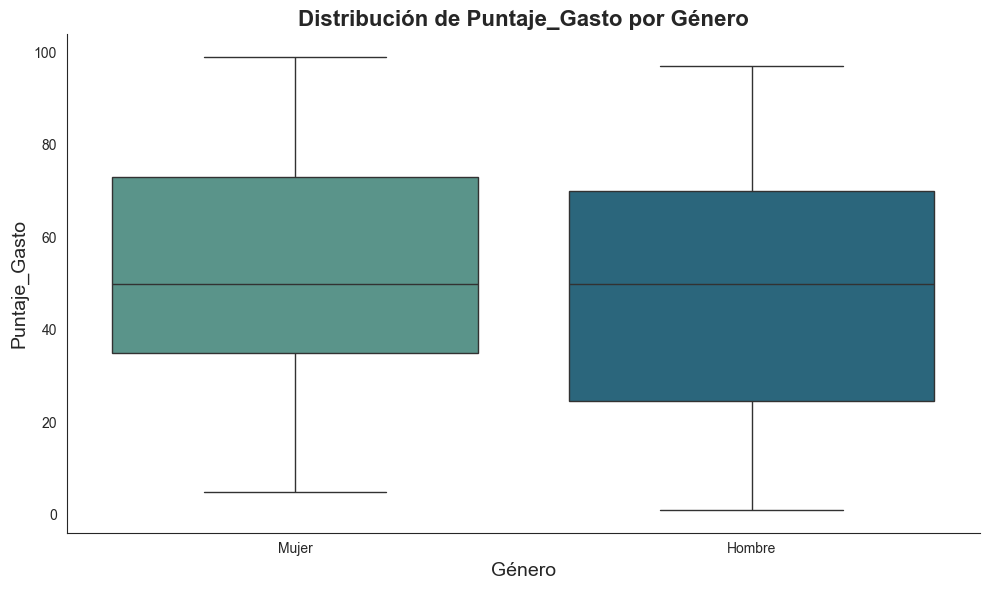

In [244]:
# Graficar varios boxplot distinguiendo por género
for col in col_numericas:
    plt.figure(figsize=(10, 6))
    sns.boxplot(
        x='Genero', 
        y=col, 
        data=clientes,
        hue='Genero', 
        palette="crest",
        legend=False
    )
    
    plt.title(f'Distribución de {col} por Género', fontsize=16, fontweight="bold")
    plt.xlabel('Género', fontsize=14)
    plt.ylabel(col, fontsize=14)
    
    sns.despine()  # quita bordes superiores y derechos
    plt.tight_layout()
    plt.show()

#### **Procedimiento boxplot por género**

* Se itera sobre las columnas numericas definidas en el bloque de codigo anterior
* Se generan diagramas de caja y bigote (boxplot) para cada variable numerica con respecto a la variable categorica `Género`

#### **Análisis de boxplot por género**

Se presentaron los boxplots de las variables **Edad**, **Ingreso** y **Puntaje de Gasto**, segmentadas por **Género**. Este tipo de gráfico permite observar la dispersión, la mediana y la presencia de valores atípicos en cada grupo.

**Distribución de Edad por Género**

- Tanto hombres como mujeres muestran una distribución de edades bastante similar.  
- La mediana de edad es ligeramente mayor en los hombres, pero la diferencia no parece ser significativa.  
- Ambos géneros presentan un rango intercuartílico amplio, lo que refleja diversidad de edades dentro de cada grupo.  

**Distribución de Ingreso por Género**

- Los ingresos están distribuidos de manera similar entre hombres y mujeres, aunque los hombres presentan algunos valores atípicos con ingresos muy altos.  
- La mediana de ingresos es apenas mayor en hombres, pero el rango intercuartílico de las mujeres es más amplio.  
- Esto indica que en el grupo femenino hay mayor dispersión de ingresos, mientras que en los hombres se observan pocos casos extremos hacia el nivel superior.  

**Distribución de Puntaje de Gasto por Género**

- La distribución del puntaje de gasto es relativamente balanceada entre ambos géneros.  
- La mediana es casi la misma, con una ligera diferencia hacia valores más altos en las mujeres.  
- Los hombres muestran una mayor dispersión en los niveles bajos de gasto, mientras que en mujeres la dispersión es más uniforme a lo largo del rango.  

#### **Conclusiones boxplot por género**
- No existen diferencias drásticas en **Edad** y **Puntaje de Gasto** entre géneros.  
- En **Ingresos**, los hombres tienden a presentar casos puntuales de ingresos muy altos, mientras que las mujeres presentan mayor variabilidad en el rango medio.  
- Esto sugiere que el género no determina por sí solo patrones radicalmente distintos, aunque puede haber diferencias sutiles en la distribución de ingresos y gasto.


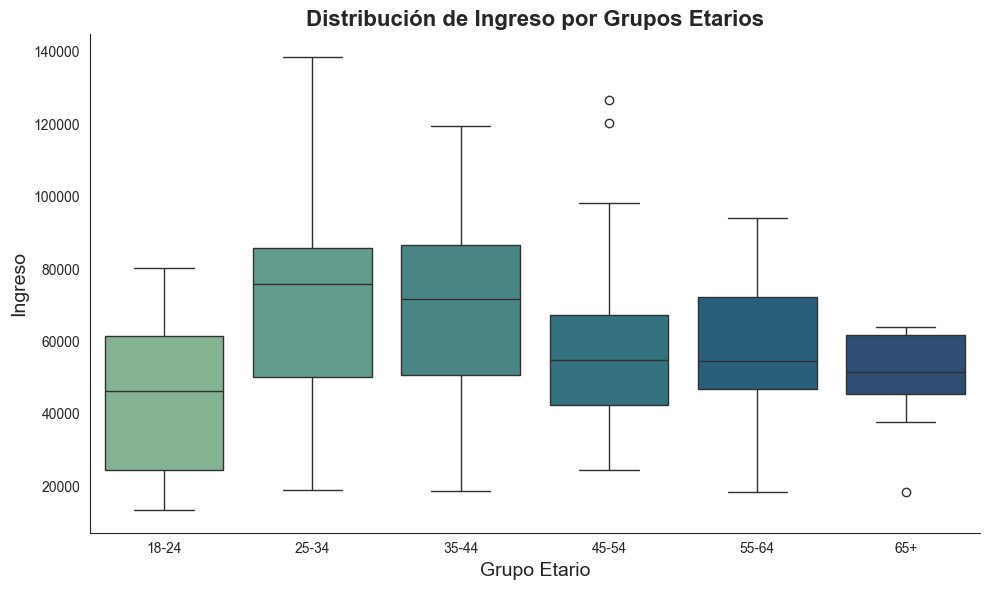

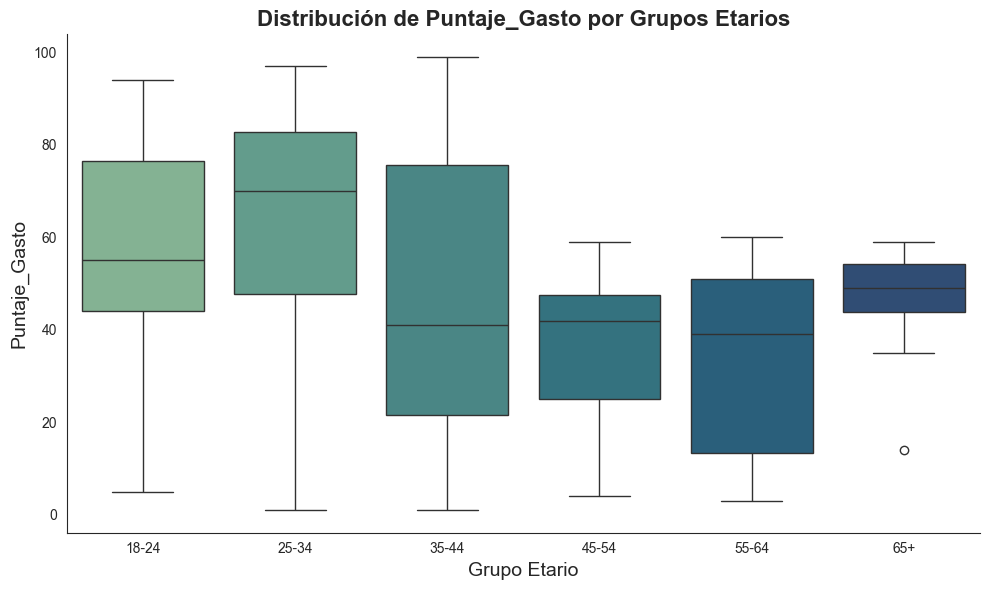

In [245]:
# Definir los rangos etarios
bins = [18, 25, 35, 45, 55, 65, float('inf')]
labels = ['18-24', '25-34', '35-44', '45-54', '55-64', '65+']

clientes['Grupo_Etario'] = pd.cut(clientes['Edad'], bins=bins, labels=labels, right=False)

col_numericas_sin_edad = ['Ingreso', 'Puntaje_Gasto']

# Graficar boxplots para cada variable numérica por grupos etarios
for col in col_numericas_sin_edad:
    plt.figure(figsize=(10, 6))
    sns.boxplot(
        x='Grupo_Etario', 
        y=col, 
        data=clientes,
        hue='Grupo_Etario', 
        palette="crest",
        legend=False
    )
    
    plt.title(f'Distribución de {col} por Grupos Etarios', fontsize=16, fontweight="bold")
    plt.xlabel('Grupo Etario', fontsize=14)
    plt.ylabel(col, fontsize=14)
    
    sns.despine()
    plt.tight_layout()
    plt.show()

#### **Procedimiento boxplot por grupos etarios**
* Se definen los grupos etarios tal como se definen en el enunciado del taller
* Se crea una columna nueva en el set de datos llamada `Grupo_etario`
* Se listan las variables numericas. En este caso no se incluye la edad
* Se itera sobre las columnas numericas y se muestran los boxplot de las variables `Ingreso` y `Puntaje_gasto` para cada `Grupo_etario`

#### **Análisis boxplot por grupos etarios**

El análisis de la relación entre `ingreso` y `puntaje de gasto` por `grupo etario` revela diferencias importantes en ambas variables según la edad.

**Distribución de Ingreso por Grupos Etarios**
* Los grupos 25-34 y 35-44 presentan los ingresos más altos y una mayor variabilidad, observándose registros de alto ingreso en ambos casos.
* El ingreso medio disminuye a partir de los 45 años, con el grupo 65+ mostrando los valores más bajos y menor dispersión.
* El rango intercuartílico es más amplio en los grupos jóvenes y adultos, lo que indica mayor desigualdad en los ingresos dentro de estos grupos.

**Distribución de Puntaje de Gasto por Grupos Etarios**
* El mayor puntaje de gasto se observa en los grupos 18-24 y 25-34, con medianas elevadas y mayor variabilidad.
* A partir de los 45 años, tanto la mediana como la dispersión del puntaje de gasto disminuyen notablemente.
* El grupo 65+ muestra una mediana relativamente estable, pero con menor variabilidad y presencia de algunos valores atípicos bajos.

#### **Conclusión boxplot por grupos etarios**
La edad está asociada tanto a diferencias en el ingreso como en el puntaje de gasto: los adultos jóvenes tienden a tener mayores ingresos y puntajes de gasto, pero también presentan mayor desigualdad interna. En los grupos de mayor edad, ambos indicadores disminuyen y se estabilizan, sugiriendo menor capacidad y/o propensión al gasto en mayores de 65 años.


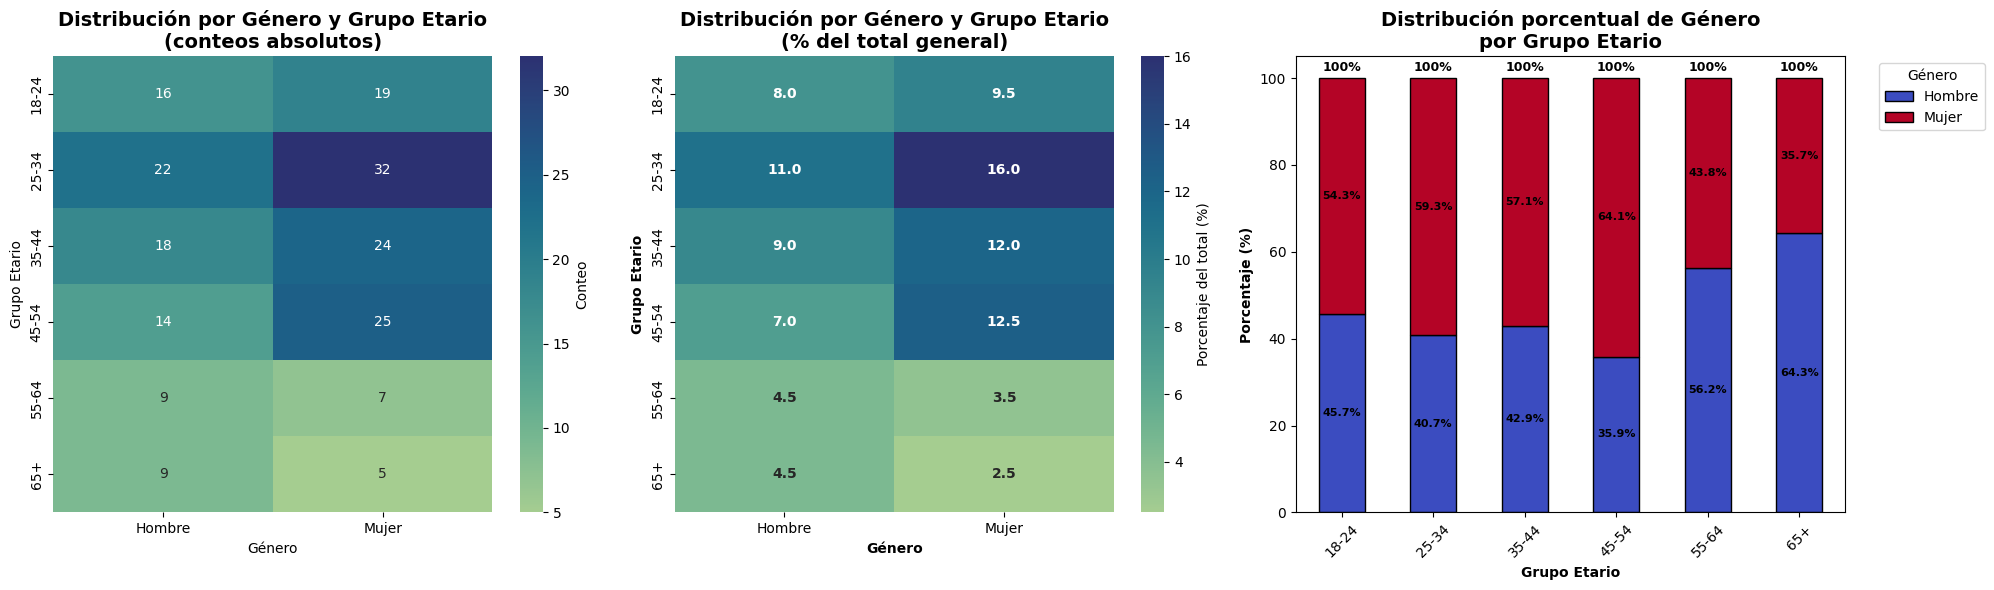

TABLAS NUMÉRICAS DE REFERENCIA

1. Tabla de conteos absolutos:
Genero        Hombre  Mujer
Grupo_Etario               
18-24             16     19
25-34             22     32
35-44             18     24
45-54             14     25
55-64              9      7
65+                9      5

2. Tabla de porcentajes del total general (%):
Genero        Hombre  Mujer
Grupo_Etario               
18-24            8.0    9.5
25-34           11.0   16.0
35-44            9.0   12.0
45-54            7.0   12.5
55-64            4.5    3.5
65+              4.5    2.5

3. Tabla de porcentajes por grupo etario (%):
Genero        Hombre  Mujer
Grupo_Etario               
18-24           45.7   54.3
25-34           40.7   59.3
35-44           42.9   57.1
45-54           35.9   64.1
55-64           56.2   43.8
65+             64.3   35.7


In [246]:
# Configuración general
plt.style.use('default')
sns.set_palette("crest")

# Crear una figura con subgráficos
fig, axes = plt.subplots(1, 3, figsize=(20, 6))

# GRÁFICO 1: Tabla de contingencia absoluta (conteos)
tabla_contingencia = pd.crosstab(clientes['Grupo_Etario'], clientes['Genero'])

sns.heatmap(
    tabla_contingencia, 
    annot=True, 
    fmt="d", 
    cmap="crest",
    cbar_kws={'label': 'Conteo'},
    ax=axes[0]
)
axes[0].set_title("Distribución por Género y Grupo Etario\n(conteos absolutos)", fontsize=14, fontweight="bold")
axes[0].set_xlabel("Género")
axes[0].set_ylabel("Grupo Etario")

# GRÁFICO 2: Porcentajes del total general
tabla_pct_total = pd.crosstab(
    clientes['Grupo_Etario'], 
    clientes['Genero'], 
    normalize='all'
) * 100

sns.heatmap(
    tabla_pct_total, 
    annot=True, 
    fmt=".1f",
    cmap="crest",
    cbar_kws={'label': 'Porcentaje del total (%)'},
    annot_kws={"size": 10, "weight": "bold"},
    ax=axes[1]
)
axes[1].set_title("Distribución por Género y Grupo Etario\n(% del total general)", fontsize=14, fontweight="bold")
axes[1].set_xlabel("Género", fontweight='bold')
axes[1].set_ylabel("Grupo Etario", fontweight='bold')


# GRÁFICO 3: Gráfico de barras apiladas (porcentajes por grupo)
tabla_pct = pd.crosstab(
    clientes['Grupo_Etario'], clientes['Genero'], normalize='index'
) * 100

ax_bar = tabla_pct.plot(
    kind="bar", 
    stacked=True, 
    colormap="coolwarm",
    edgecolor='black',
    ax=axes[2]
)

axes[2].set_title("Distribución porcentual de Género\npor Grupo Etario", fontsize=14, fontweight="bold")
axes[2].set_xlabel("Grupo Etario", fontweight='bold')
axes[2].set_ylabel("Porcentaje (%)", fontweight='bold')
axes[2].legend(title="Género", bbox_to_anchor=(1.05, 1), loc='upper left')
axes[2].tick_params(axis='x', rotation=45)

# Añadir porcentajes en las barras
for bar in ax_bar.containers:
    labels = [f'{val:.1f}%' if val > 5 else '' for val in bar.datavalues]
    ax_bar.bar_label(bar, labels=labels, label_type='center', fontsize=8, fontweight='bold')

# Añadir porcentaje total en la parte superior
for i, (index, row) in enumerate(tabla_pct.iterrows()):
    total_height = row.sum()
    ax_bar.text(i, total_height + 1, f'{total_height:.0f}%', 
                ha='center', va='bottom', fontweight='bold', fontsize=9)

# Ajustar layout
plt.tight_layout()
plt.show()

# TABLAS NUMÉRICAS DE REFERENCIA
print("TABLAS NUMÉRICAS DE REFERENCIA")

print("\n1. Tabla de conteos absolutos:")
print(tabla_contingencia)

print("\n2. Tabla de porcentajes del total general (%):")
print(tabla_pct_total.round(1))

print("\n3. Tabla de porcentajes por grupo etario (%):")
print(tabla_pct.round(1))

#### **Procedimiento tablas de contingencia**

* Se generan 3 graficos para inspeccionar las relaciones entre las variables categoricas.
* El primer gráfico presenta una tabla de contingencia con los conteos absolutos de clientes agrupados por género y grupo etario, utilizando pd.crosstab y la función sns.heatmap.
* El segundo gráfico emplea la misma tabla de contingencia pero normalizada respecto al total de la muestra, mostrando los porcentajes generales.
* El tercer gráfico es una barra apilada que presenta, para cada grupo etario, la distribución porcentual interna de género, calculada normalizando por filas. Además, se añadieron etiquetas personalizadas con los porcentajes correspondientes y la suma total en la parte superior de cada barra para facilitar la interpretación visual de la distribución.

#### **Análisis tablas de contingencia**
* El grupo etario más numeroso en ambos géneros corresponde a 25-34 años, con un claro predominio femenino (32 mujeres vs. 22 hombres) en los conteos absolutos.
* La participación porcentual más significativa del total general aparece en mujeres de 25-34 años (16%), seguidas por hombres en el mismo rango etario (11%).
* En los grupos etarios de mayor edad (55-64 y 65+), la participación es menor en términos absolutos y relativos, pero se observa un cambio: en los grupos de mayor edad, el porcentaje de hombres aumenta, llegando a 64.3% en el grupo 65+.
* En el gráfico de barras apiladas, se visualiza que a partir de 55 años, los hombres representan la mayoría dentro de esos grupos, mientras que en los grupos más jóvenes las mujeres predominan, especialmente entre 25 y 54 años.

#### **Conclusiones tablas de contingencia**
* El análisis revela una estructura demográfica en la que las mujeres tienen mayor representación en los grupos etarios intermedios, especialmente entre los 25 y 54 años, posiblemente reflejando una mayor presencia o interés de este segmento en el contexto analizado.
* Los hombres predominan en los grupos de mayor edad, lo que podría indicar diferencias de comportamiento, acceso o afinidad en función del género y la edad. Esta segmentación es valiosa para orientar estrategias de comunicación, marketing, o personalización de servicios según el perfil dominante de cada grupo.

In [247]:
from scipy import stats

def tabla_significancia(df, variables, grupos):
    """
    ANALIZA significancia estadística de variables numéricas entre grupos categóricos
    
    PARÁMETROS:
    - df: DataFrame con los datos
    - variables: lista/tupla de variables numéricas a analizar
    - grupos: lista de variables categóricas para comparar
    
    RETORNA:
    - DataFrame con p-values y significancia para cada combinación variable-grupo
    
    FUNCIONALIDAD:
    1. Para cada variable y cada grupo categórico:
    2. Separa los datos en subgrupos según categorías
    3. Aplica:
       - Test de Mann-Whitney U para 2 grupos
       - Test de Kruskal-Wallis para 3+ grupos
    4. Determina significancia (p < 0.05)
    5. Devuelve tabla resumen con resultados
    """
    resultados = []
    
    for var in variables:
        for grupo in grupos:
            grupos_data = [df[df[grupo] == g][var].dropna() 
                          for g in df[grupo].unique()]
            
            if len(grupos_data) == 2:
                p_value = stats.mannwhitneyu(grupos_data[0], grupos_data[1]).pvalue
            else:
                p_value = stats.kruskal(*grupos_data).pvalue
            
            resultados.append({
                'Variable': var,
                'Grupo': grupo,
                'p_value': p_value,
                'Significativo': p_value < 0.05
            })
    
    return pd.DataFrame(resultados)

resultados_df = tabla_significancia(clientes, ('Ingreso', 'Puntaje_Gasto'), ['Genero', 'Grupo_Etario'])
print(resultados_df)

        Variable         Grupo   p_value  Significativo
0        Ingreso        Genero  0.461048          False
1        Ingreso  Grupo_Etario  0.000028           True
2  Puntaje_Gasto        Genero  0.571279          False
3  Puntaje_Gasto  Grupo_Etario  0.000001           True


#### **Procedimiento análisis estadistico básico**
* Se define una función que analiza la significancia estadística de variables numéricas entre grupos categóricos
* Se aplica la función a los datos de `Ingresos` y `Puntaje_Gasto` con respecto al `Género` y al `Grupo_etario`

#### **Análisis estadistico básico**

**Diferencias por Género**
* Ingreso (p = 0.461): No existe evidencia estadística para afirmar que haya diferencias significativas en los ingresos entre hombres y mujeres.
* Puntaje_Gasto (p = 0.571): Tampoco hay diferencias significativas en los patrones de gasto entre géneros.

Resultado: El género no es un factor determinante en las diferencias de ingresos o patrones de gasto en esta muestra.

**Diferencias por Grupo Etario**
* Ingreso (p = 0.000028): Existen diferencias altamente significativas en los ingresos entre los diferentes grupos de edad.
* Puntaje_Gasto (p = 0.000001): También hay diferencias muy significativas en los patrones de gasto entre grupos etarios.

Resultado: La edad sí es un factor determinante tanto para los ingresos como para los patrones de gasto.

#### **Conclusiones Analisis estadistico básico**
* Dado que el género no muestra diferencias significativas, las campañas podrían ser más efectivas si se enfocan en segmentos por edad en lugar de género.
* Las diferencias por grupo etario sugieren que:
    * Los productos/servicios podrían diseñarse considerando las características específicas de cada grupo de edad
    * Los precios podrían segmentarse según la capacidad adquisitiva de cada grupo etario

### 3. Clustering Jerárquico

#### 3.1. Dendrogramas

Agrupe a los clientes utilizando sólo dos variables: su ingreso y el puntaje de gastos. Para ello retenga estas dos variables, estandarízelas, construya y grafique un dendograma. Para la construcción del dendrograma utilice el enlace 'ward' y la distancia euclidiana. Explique la importancia de estandarizar los datos.

Text(0, 0.5, 'Puntaje de Gasto (0-100)')

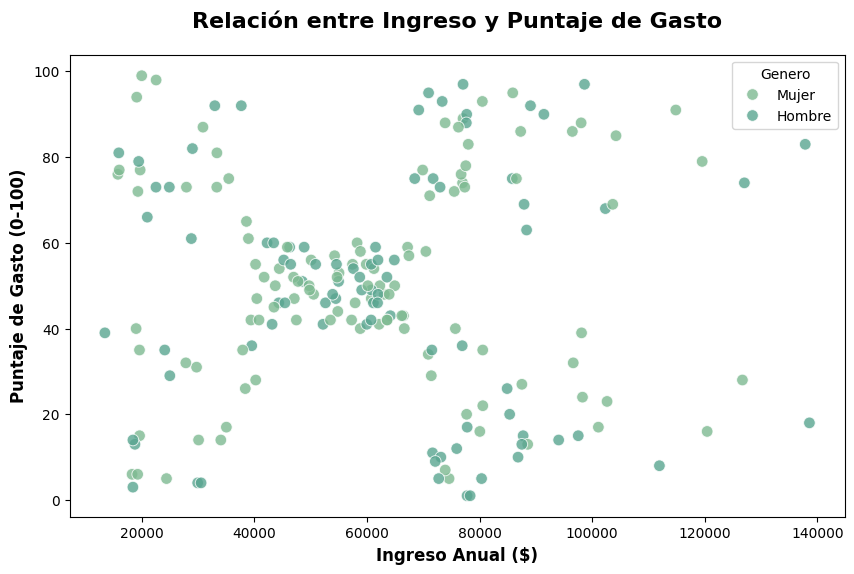

In [248]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Ingreso', y='Puntaje_Gasto', hue='Genero', s=70, alpha=0.8, data=clientes)
plt.title('Relación entre Ingreso y Puntaje de Gasto', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Ingreso Anual ($)', fontsize=12, fontweight='bold')
plt.ylabel('Puntaje de Gasto (0-100)', fontsize=12, fontweight='bold')

Se genera un diagrama de dispersión para hacer una inspección visual a los posibles clusters que puedan ser distinguidos.

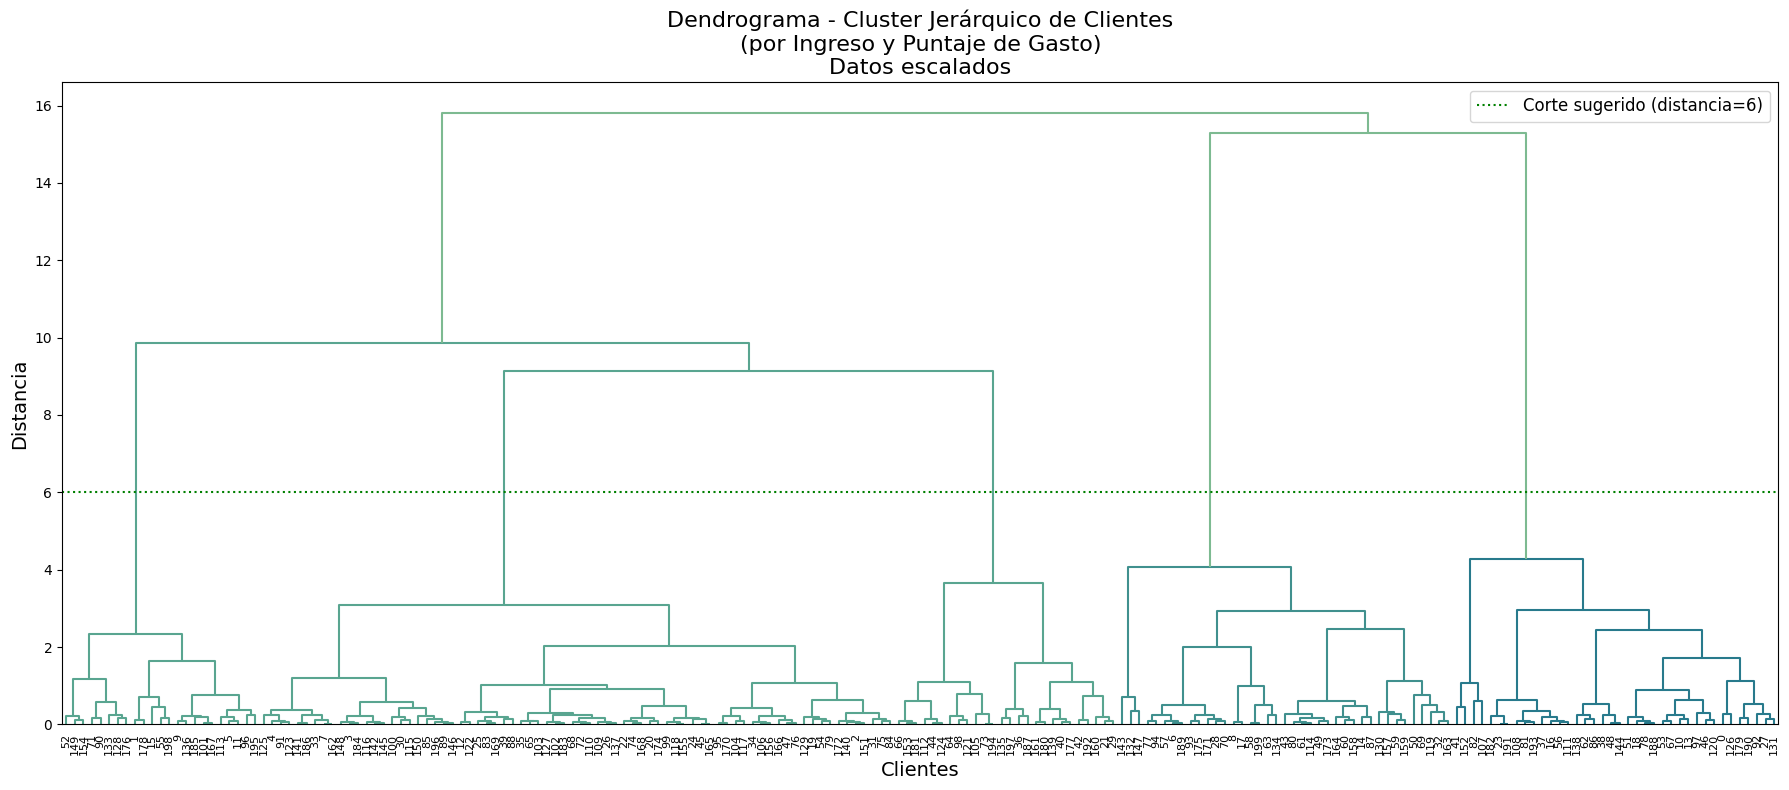

In [249]:
from scipy.spatial.distance import pdist
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from sklearn.preprocessing import scale

clientes_2dim = clientes[[ 'Ingreso', 'Puntaje_Gasto']]
dist = pdist(scale(clientes_2dim), metric='euclidean')
Z = linkage(dist, method='ward')

fig, ax = plt.subplots(figsize=(18, 8))
d = dendrogram(Z, show_leaf_counts=True, leaf_font_size=8, ax=ax)
ax.set_xlabel('Clientes', fontsize=14)
ax.set_yticks(np.arange(0, 17, 2))
ax.set_ylabel('Distancia', fontsize=14)
ax.set_title('Dendrograma - Cluster Jerárquico de Clientes\n(por Ingreso y Puntaje de Gasto)\nDatos escalados', fontsize=16)
plt.axhline(y=6, color='g', linestyle=':', label='Corte sugerido (distancia=6)')
ax.legend(fontsize=12, loc='upper right')
plt.tight_layout()
plt.show()

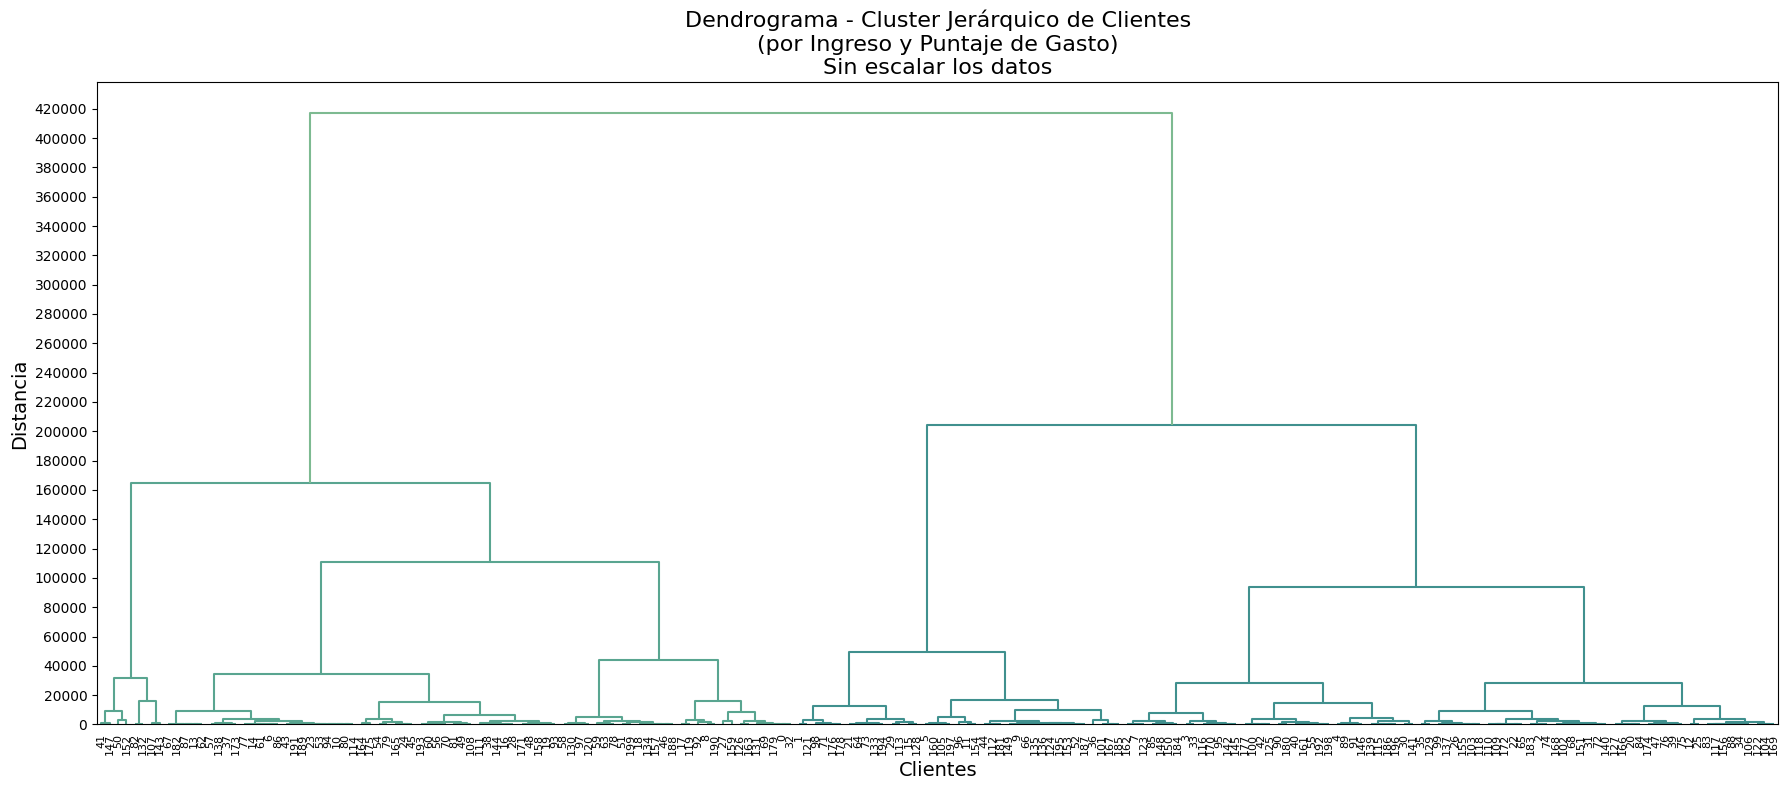

In [250]:
dist_2 = pdist(clientes_2dim, metric='euclidean')
Z_2 = linkage(dist_2, method='ward')

fig, ax = plt.subplots(figsize=(18, 8))
d = dendrogram(Z_2, show_leaf_counts=True, leaf_font_size=8, ax=ax)
ax.set_xlabel('Clientes', fontsize=14)
ax.set_yticks(np.arange(0, 440000, 20000))
ax.set_ylabel('Distancia', fontsize=14)
ax.set_title('Dendrograma - Cluster Jerárquico de Clientes\n(por Ingreso y Puntaje de Gasto)\nSin escalar los datos', fontsize=16)
plt.tight_layout()
plt.show()

#### **Procedimiento**
* Se generó un diagrama de dispersión para explorar las relaciones entre el Ingreso y el Puntaje de gasto.
* Se cargan las librerias necesarias como pdist, linkage y dendogram de scipy y tambien se carga la libreria sclae de sklearn
* Se crea un nuevo dataframe de 2 dimensiones con las columnas Ìngreso` y `Puntaje_Gasto`
* Se calcula la matriz de distancia usando pdist, sin embargo los datos son esclados usando scale
* Se usa distancia euclidiana y método de enlace Ward
* Tambien se muestra el dendograma sin escalar los datos para visualizar el efecto de no tener una variable que domine a la otra en terminos de rango de valores.

#### **Análisis**
* Este dendrograma muestra la agrupación jerárquica de clientes basada en Ingreso y Puntaje de Gasto, utilizando el método de clustering jerárquico.
* El dendrograma representa cómo los clientes se agrupan de manera sucesiva según su similitud.
* Se observan agrupaciones con distancias bajas (cercanos entre sí) y ramas largas que revelan clientes o subgrupos más distantes del resto.
* Las divisiones reflejan diversidad en patrones de consumo y capacidad adquisitiva, permitiendo identificar grupos prioritarios para estrategias diferenciadas.
* Es posible observar que cuando los datos no son estandarizados es posible que una variable domine el calculo de las distancias.
    * En este caso, al no escalar las variables las distancias son mucho mas altas (por varios ordenes de magnitud)
    * Esto causa que el efecto o la contribución del resto de variables a la constitución de los clusteres se vea opacada y practicamente anulada.
    * Para los datos de este análisis las diferencia de Ingresos terminan siendo mas relevantes que el puntaje de gasto, lo que en la practica equivale a que el efecto de esta segunda variable sea nulo.
* El diagrama de dispersión parece mostrar 5 areas que concentran los datos
    * Esquina inferior izquierda: Ingresos menores a 40k y Puntajes inferior a 40 (Bajos ingresos, bajo gasto)
    * Esquina superior izquierda: Ingresos menores a 40k y Puntajes mayores a 60 (Bajos ingresos, alto gasto)
    * Centro: Ingresos entre 40k y 70k con Puntajes entre 40 y 60 (Medio ingreso, medio gasto)
    * Esquina superior derecha: Ingresos mayores a 70k y Puntaje superiores a 60 (Altos ingresos, Alto gasto)
    * Esquina inferior derecha: Ingresos mayores a 70k y Puntajes menores a 40 (Altos ingresos, bajo gasto)

#### **Conclusiones**
* La segmentación jerárquica es útil para definir estrategias personalizadas de marketing, precios o fidelización según el perfil de cada grupo.
* La visualización del dendograma también facilita la interpretación y justificación de los grupos ante equipos no especializados.

#### 3.2. Número de clusters

Retenga el número de clusters que se obtengan luego de fijar la distancia en 6.

In [251]:
from scipy.cluster.hierarchy import fcluster
num_cluster=len(np.unique(fcluster(Z,6, criterion='distance')))
print(f'El número de clusters luego de fijar la distancia en 6 es: {num_cluster}')

El número de clusters luego de fijar la distancia en 6 es: 5


#### **Procedimiento**
* Se usa la función fcluster de SciPy para formar clusters a partir del resultado del clustering jerárquico. Aquí, distances1 es la estructura de enlace o matriz de distancias, y 6 es el valor umbral para cortar el dendrograma por distancia
* Se obtienen los valores únicos (los diferentes clusters formados después de aplicar el corte).
* Se cuentan cuántos clusters distintos se formaron al cortar el árbol a la distancia 6.
* Finalmente, num_cluster almacena el número total de clusters que resultaron de esa división.

#### **Análisis**
* Fijando la distancia en 6 se obtienen 5 clusters, lo que tambien puede ser evidenciado visualmente en el dendograma con la linea horizontal en y=6

#### 3.3. Algoritmo Jerárquico Aglomerativo

Utilizando el número de clusters encontrados en el paso anterior, aplique el algoritmo jerárquico aglomerativo, utilizando el enlace 'ward' y la distancia euclidiana. Describa los grupos encontrados, en que grupo o grupos concentraría su estrategia de marketing y por qué?

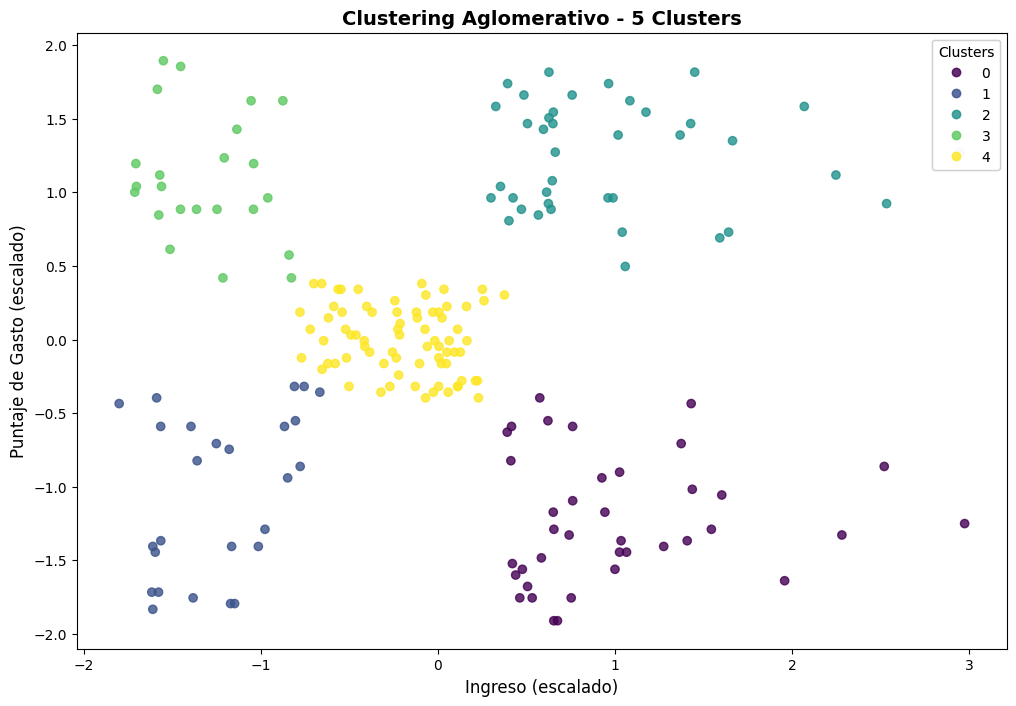

In [252]:
from sklearn.cluster import AgglomerativeClustering

X = scale(clientes_2dim)

cluster_sk = AgglomerativeClustering(n_clusters=5, metric='euclidean', linkage='ward')
#Nota para quiene esten usando la versión 1.4., la opción affinity fue renombrada a metric
cluster_sk = cluster_sk.fit_predict(X)

fig, ax = plt.subplots(figsize=(12,8), dpi= 100, facecolor='w', edgecolor='k')
g = plt.scatter(X[:,0], X[:,1], c = cluster_sk, alpha = 0.8)
legend = ax.legend(*g.legend_elements(), loc = "upper right", title = "Clusters")
ax.add_artist(legend)
plt.title('Clustering Aglomerativo - 5 Clusters', fontsize=14, fontweight='bold')
plt.ylabel('Puntaje de Gasto (escalado)', fontsize=12)
plt.xlabel('Ingreso (escalado)', fontsize=12)
plt.show()

In [253]:
# se realiza un analisis de los clusters obtenidos
clientes['Cluster_Aglomerativo'] = cluster_sk
resumen_clusters = clientes.groupby('Cluster_Aglomerativo').agg(
    N_Muestras=('Edad', 'count'),
    Media_Edad=('Edad', 'mean'),
    Min_Edad=('Edad', 'min'),
    Max_Edad=('Edad', 'max'),
    Media_Ingreso=('Ingreso', 'mean'),
    Min_Ingreso=('Ingreso', 'min'),
    Max_Ingreso=('Ingreso', 'max'),
    Media_Puntaje=('Puntaje_Gasto', 'mean'),
    Min_Puntaje=('Puntaje_Gasto', 'min'),
    Max_Puntaje=('Puntaje_Gasto', 'max')
).round(2)

print("RESUMEN ESTADÍSTICO POR CLUSTER")
print(resumen_clusters.reset_index().to_string(index=False))

RESUMEN ESTADÍSTICO POR CLUSTER
 Cluster_Aglomerativo  N_Muestras  Media_Edad  Min_Edad  Max_Edad  Media_Ingreso  Min_Ingreso  Max_Ingreso  Media_Puntaje  Min_Puntaje  Max_Puntaje
                    0          38       40.39        19        59       87055.07     70888.72    138584.52          18.63            1           40
                    1          26       44.12        19        67       28274.67     13458.02     43155.28          23.31            3           42
                    2          39       32.69        27        40       86537.50     68486.79    137838.57          82.13           63           97
                    3          23       25.52        18        35       26230.42     15766.84     38950.66          78.57           61           99
                    4          74       43.59        18        70       55451.26     40218.68     70469.66          50.22           40           60


#### **Procedimiento**
* Se aplica el algoritmo jerarquico aglomerativo a los datos escalados y con el numero de clusters hallado en el punto anterior (5)
* Se grafica el resultado del paso anterior confirmando la existencia de los 5 clusters
* Se agrupan los datos para mostrar estadisticas basicas de cada grupo y poder describirlos

#### **Análisis**
**Cluster 0: "Adultos de Alto Ingreso - Bajo Gasto"**
* Edad: 40.39 años (rango: 19-59 años)
* Ingreso: $87,055 (alto, rango: $70,889-$138,585)
* Puntaje Gasto: 18.63 (muy bajo, rango: 1-40)
* Perfil: Adultos con ingresos altos pero extremadamente conservadores en sus gastos. Posiblemente ahorradores o inversores cautelosos.

**Cluster 1: "Adultos de Ingreso Bajo - Gasto Moderado"**
* Edad: 44.12 años (rango: 19-67 años)
* Ingreso: $28,275 (bajo, rango: $13,458-$43,155)
* Puntaje Gasto: 23.31 (bajo-moderado, rango: 3-42)
* Perfil: Personas de mediana edad con ingresos limitados que gastan de manera muy contenida, probablemente por necesidad más que por preferencia.

**Cluster 2: "Jóvenes de Alto Ingreso - Alto Gasto"**
* Edad: 32.69 años (jóvenes adultos, rango: 27-40 años)
* Ingreso: $86,538 (alto, rango: $68,487-$137,839)
* Puntaje Gasto: 82.13 (muy alto, rango: 63-97)
* Perfil: Profesionales jóvenes exitosos con alto poder adquisitivo y alta disposición al gasto.

**Cluster 3: "Jóvenes de Ingreso Bajo - Alto Gasto"**
* Edad: 25.52 años (jóvenes, rango: 18-35 años)
* Ingreso: $26,230 (bajo, rango: $15,767-$38,951)
* Puntaje Gasto: 78.57 (alto, rango: 61-99)
* Perfil: Jóvenes con ingresos limitados pero alta propensión al consumo. Posiblemente estudiantes o profesionales entry-level que priorizan estilo de vida.

**Cluster 4: "Adultos de Ingreso Medio - Gasto Moderado"**
* Edad: 43.59 años (adultos, rango: 18-70 años)
* Ingreso: $55,451 (medio, rango: $40,219-$70,470)
* Puntaje Gasto: 50.22 (moderado, rango: 40-60)
* Perfil: Grupo diverso en edad con ingresos medios y patrones de gasto equilibrados. Familias o personas con gastos fijos predecibles.
* Este es el grupo con mayor numero de observaciones

#### **Conclusion**
Sobre la pregunta de donde concentrar una estrategia de marketing y luego de este analisis es posible establecer que una estrategia que busca atraer clientes con gran capacidad de compra deberia estar enfocada en los jovenes, en particular a los clusters 2 y 3. Sin embargo si de población se trata entonces el cluster 4 debe estar en el foco de la estrategia al ser el cluester mas grande y por tanto mas representativo del grueso de clientes. A continuación se esbozan algunas razones:

**Estrategia primaria: Cluster 2 ("Jóvenes de Alto Ingreso - Alto Gasto") y Cluster 3 ("Jóvenes de Ingreso Bajo - Alto Gasto")**
* Mayor ROI potencial: Combinan alto y bajo ingreso con alta disposición al gasto
* Largo ciclo de vida: Al ser jóvenes, tienen mayor potencial de fidelización a largo plazo
* Influenciadores: Suelen imponer nuevas tendencias y pueden influir en otros grupos de personas
* Menor resistencia al gasto: Alta puntuación de gasto indica menor aversión al consumo
* Potencial de crecimiento: A medida que aumenten sus ingresos, pueden mantener patrones de gasto alto
* Pueden ser potenciales clientes para productos de entrada y de opciones de financiamiento

**Estrategia Secundaria: Cluster 4 ("Adultos de Ingreso Medio - Gasto Moderado")**
* Representa la columna vertebral del mercado - clientes estables, predecibles y con potencial de lealtad a largo plazo.
* Al ser el grupo más grande, justifica campañas masivas
* Podrian ser potenciales clientes de productos de valor medio-alto con buena relación calidad-precio
* Dado el amplio rango de edad (18-70 años), se podria sub-segmentar

### 4. DBSCAN

Implemente DBSCAN, al igual que el punto anterior sólo dos variables: su ingreso y el puntaje de gastos. Al implementar  justifique su elección de `min_samples` y `eps`. ¿Cuántos grupos o clusters encuentra? ¿Cuáles son su características? ¿Cambiaría su estrategia de marketing respecto al punto anterior? Justifique su respuesta.

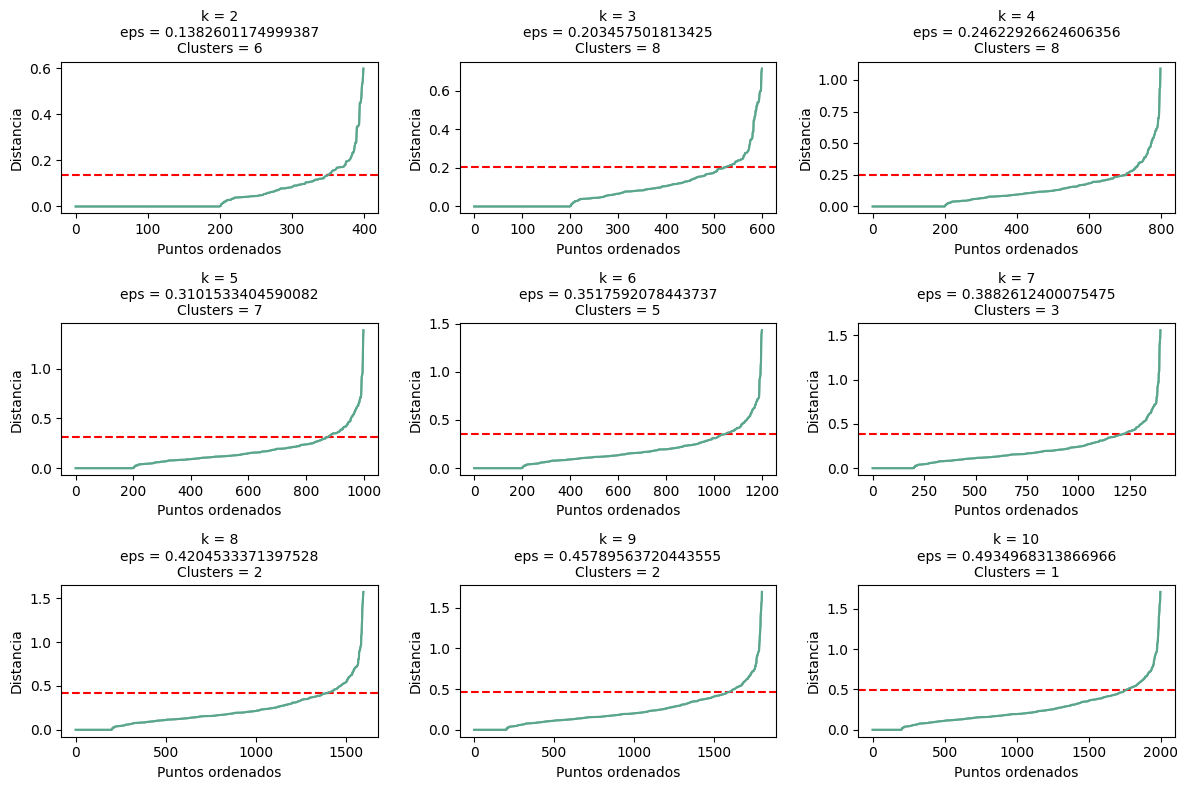

In [254]:
# Cargamos NeighborsNeighbors
from sklearn.neighbors import NearestNeighbors
from kneed import KneeLocator
from sklearn.cluster import DBSCAN

k_values = [2, 3, 4, 5, 6, 7, 8, 9, 10]
plt.figure(figsize=(12, 8))

for i, k in enumerate(k_values, 1):
    neigh = NearestNeighbors(n_neighbors = k)
    nbrs = neigh.fit(X)
    distancias, indices = nbrs.kneighbors(X)
    distancias = np.sort(distancias.flatten())
    
    j = np.arange(len(distancias))
    knee = KneeLocator(j, distancias, S=1, curve='convex', direction='increasing', interp_method='polynomial')
    eps_kneed = distancias[knee.knee]
    db = DBSCAN(eps = eps_kneed, min_samples = 4).fit(X)
    clusteres = db.labels_
    n_clusteres = len(set(clusteres)) - (1 if -1 in clusteres else 0)

    plt.subplot(3, 3, i)
    plt.plot(distancias)
    
    plt.axhline(y = eps_kneed, color = 'r', linestyle = '--')
    plt.plot(distancias)
    plt.title(f'k = {k}\neps = {eps_kneed}\nClusters = {n_clusteres}', fontsize=10)
    plt.xlabel('Puntos ordenados')
    plt.ylabel('Distancia')

plt.tight_layout()
plt.show()


#### **Procedimiento estimación `eps`**
* Se exploran multiples valores de k para NearestNeighbors siguiendo la metodologia de Rahmah y Sukaesih para estimar el parametro epsilon.
* Esto se consigue definiendo un ciclo for para distintos valores de k entre 2 y 10

#### **Análisis estimación `eps`**
* Visualmente el codo es mas visible cuando k es igual a 4, 5, 6 o 7.
* Estos valores de k tambien producen un numero razonable de clusters
* Para k=4, se obtienen 8 clusters, mostrando una segmentación más rica y diferenciada.
* Para k=5 se obtienen 7 clusters, para k=6 se obtienen 5 clusters, y para k=7 se obtienen 3 clusters. Más allá de k=7, el número de clusters disminuye drásticamente.
* Una correcta elección de k genera no solo un número de clusters razonable, sino también una curva con un "codo" marcado y eps situado en la zona de cambio abrupto de la pendiente.
* Dados los resultados visuales y la metodología empleada, los valores óptimos de k se sitúan en k=4, k=5, k=6 o k=7. Estos producen una cantidad manejable de clusters y una estimación adecuada del parámetro eps según la sugerencia del gráfico.

#### **Conclusión estimación `eps`**
* Se escoge el valor de k=5, con el que se consiguen 7 clusters

#### **Sobre la estimación de `min_samples`**
* Dado que en este punto solo se cuenta con 2 variables es posible establecer el valor de `min_samples` = 4, sugerido por Ester et al. (1996).

Con estos parametros estimados, es posible ahora hacer la clasificación con DBSCAN y graficar los resultados.


Text(0.5, 1.0, 'Se encontraron 7 clusteres para epsilon 0.31')

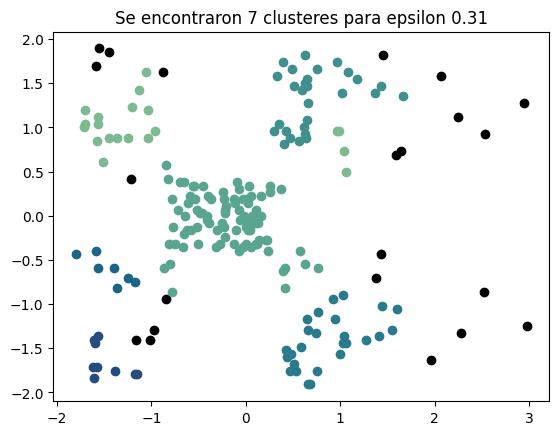

In [255]:
from sklearn.cluster import DBSCAN

epsilon = 0.31

db = DBSCAN(eps = epsilon, min_samples = 4).fit(X)
clusteres = db.labels_
n_clusteres = len(set(clusteres)) - (1 if -1 in clusteres else 0)
resultado = pd.DataFrame(X).assign(Cluster = clusteres)
plt.figure()
for k in np.unique(clusteres):
    if k != -1:
        plt.scatter(
            x = resultado.loc[resultado.Cluster == k, 0], 
            y = resultado.loc[resultado.Cluster == k, 1]
            )
    else:
        plt.scatter(
            x = resultado.loc[resultado.Cluster == k, 0], 
            y = resultado.loc[resultado.Cluster == k, 1],
            c = "black"
            )
plt.title('Se encontraron %d clusteres para epsilon %0.2f' % (n_clusteres, epsilon))

In [256]:
# se realiza un analisis de los clusters obtenidos
clientes['Cluster_DBSCAN'] = clusteres
resumen_clusters = clientes.groupby('Cluster_DBSCAN').agg(
    N_Muestras=('Edad', 'count'),
    Media_Edad=('Edad', 'mean'),
    Min_Edad=('Edad', 'min'),
    Max_Edad=('Edad', 'max'),
    Media_Ingreso=('Ingreso', 'mean'),
    Min_Ingreso=('Ingreso', 'min'),
    Max_Ingreso=('Ingreso', 'max'),
    Media_Puntaje=('Puntaje_Gasto', 'mean'),
    Min_Puntaje=('Puntaje_Gasto', 'min'),
    Max_Puntaje=('Puntaje_Gasto', 'max')
).round(2)

print("RESUMEN ESTADÍSTICO POR CLUSTER")
print(resumen_clusters.reset_index().to_string(index=False))

RESUMEN ESTADÍSTICO POR CLUSTER
 Cluster_DBSCAN  N_Muestras  Media_Edad  Min_Edad  Max_Edad  Media_Ingreso  Min_Ingreso  Max_Ingreso  Media_Puntaje  Min_Puntaje  Max_Puntaje
             -1          22       36.05        23        54       80092.03     19113.29    138584.52          55.32            8           99
              0          16       23.75        18        31       24849.04     15766.84     35458.14          77.31           66           92
              1          88       42.88        18        70       55330.36     37926.15     80565.01          48.58           28           65
              2          28       33.11        27        40       79373.13     68486.79    104232.75          84.29           71           97
              3          26       41.42        19        59       83410.83     71651.08    102643.75          13.77            1           27
              4           7       36.71        19        52       22674.71     13458.02     29740.62          34.43 

#### **Caracterización de los clusters**

**Cluster -1: "Ruido - Mixto Extremo" (22 personas)**
* Perfil: Grupo heterogéneo sin patrón claro (considerado ruido por DBSCAN)
* Ingreso: Muy variable ($19K-$138K)
* Gasto: Extremadamente variable (8-99)
* Interpretación: Posibles errores de datos o casos atípicos genuinos

**Cluster 0: "Jóvenes bajo ingreso - alto gasto" (16 personas)**
* Edad: 23.8 años (jóvenes, 18-31 años)
* Ingreso: Bajo ($24.8K)
* Gasto: Alto (77.3)
* Perfil: Jóvenes que gastan casi todo lo que ganan

**Cluster 1: "Familias Establecidas - Moderadas" (88 personas)**
* Edad: 42.9 años (adultos, 18-70 años)
* Ingreso: Medio ($55.3K)
* Gasto: Moderado (48.6)
* Perfil: Clase media estable, mayoritario y diverso

**Cluster 2: "Profesionales Jóvenes - muy alto gasto" (28 personas)**
* Edad: 33.1 años (jóvenes adultos, 27-40 años)
* Ingreso: Alto ($79.4K)
* Gasto: Muy alto (84.3)
* Perfil: Profesionales exitosos con alto consumo

**Cluster 3: "Adultos Conservadores - Ahorradores" (26 personas)**
* Edad: 41.4 años (adultos, 19-59 años)
* Ingreso: Alto ($83.4K)
* Gasto: Muy bajo (13.8)
* Perfil: Ahorradores/inversores de alto ingreso

**Cluster 4: "Adultos bajo ingreso - Moderados" (7 personas)**
* Edad: 36.7 años (adultos, 19-52 años)
* Ingreso: Muy bajo ($22.7K)
* Gasto: Moderado-bajo (34.4)
* Perfil: Posible error de datos o situación financiera crítica

**Cluster 5: "Adultos Bajo ingreso - Muy Conservadores" (9 personas)**
* Edad: 48.9 años (maduros, 20-67 años)
* Ingreso: Muy bajo ($22K)
* Gasto: Mínimo (7.8)
* Perfil: Personas mayores con ingresos limitados y gasto muy conservador

**Cluster 6: "Jóvenes altos ingresos - alto gasto" (4 personas)**
* Edad: 30.8 años (jóvenes, 27-36 años)
* Ingreso: Muy alto ($87.2K)
* Gasto: Alto (70.5)
* Perfil: Jóvenes de elite con alto poder adquisitivo

#### **Estrategias**
* CLUSTER 1 (88 personas) - Cluster mayoritario
    * Este cluster posiblemente refleja el cliente tradicional y debe ser priorizado
    * Productos: Paquetes familiares, bienes duraderos
    * Precio: Medio, con planes de financiamiento

* CLUSTER 2 (28 personas) - ALTO POTENCIAL
    * Estrategia: "Experiencias Premium para Jóvenes Exitosos"
    * Productos: Bienes de lujo, tecnología premium, experiencias
    * Precio: Premium, valor por encima del precio

En definitiva esta nueva clusterización cambio por completo los grupos sin embargo podria decirse que se trata de sub-divisiones intra clusters respecto de los que habian sido definidos usando cluster jerarquico.

### 5. Incorporando más dimensiones

Hasta este momento hemos utilizado solo dos variables para nuestro análisis, sin embargo, la base cuenta con otras variables más: género y edad. Usando las categorías de edad creadas anteriormente incorpore género y grupo etario a su análisis. Genere los grupos utilizando DBSCAN y la distancia de Gower, justificando su elección de `min_samples` y `eps`   ¿Incorporar estas variables, ayuda a la focalización de la estrategia de marketing?

In [257]:
clientes_all = clientes.copy()
clientes_all.drop(columns = ['Id_Cliente','Cluster_Aglomerativo','Cluster_DBSCAN' ], inplace=True)
clientes_all.head()

,Genero,Edad,Ingreso,Puntaje_Gasto,Grupo_Etario
0,Mujer,41,98115.05,39,35-44
1,Mujer,20,35458.14,75,18-24
2,Mujer,68,59872.08,55,65+
3,Hombre,63,48508.93,51,55-64
4,Mujer,31,44431.11,54,25-34


In [258]:
columnas_numericas = ['Edad', 'Ingreso', 'Puntaje_Gasto']
clientes_all_escalado = clientes_all.copy()
clientes_all_escalado[columnas_numericas] = scale(clientes_all[columnas_numericas])
clientes_all_escalado['Grupo_Etario'] = clientes_all_escalado['Grupo_Etario'].astype('object')
clientes_all_escalado.head()

,Genero,Edad,Ingreso,Puntaje_Gasto,Grupo_Etario
0,Mujer,0.154298,1.431094,-0.434801,35-44
1,Mujer,-1.352802,-0.960650,0.962775,18-24
2,Mujer,2.091999,-0.028719,0.186343,65+
3,Hombre,1.733166,-0.462474,0.031057,55-64
4,Mujer,-0.563369,-0.618133,0.147522,25-34


In [259]:
import gower

# Calculamos la matriz de distancias de Gower
gower_dist = gower.gower_matrix(clientes_all_escalado)

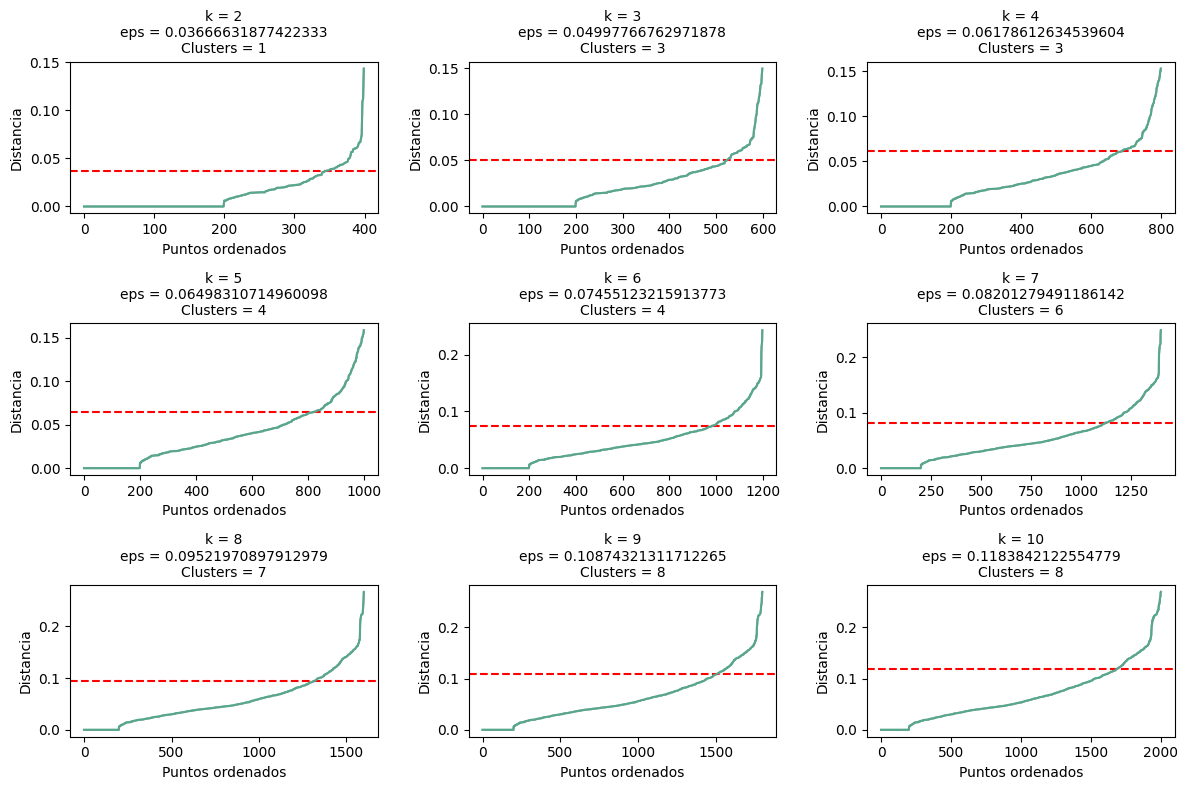

In [260]:
k_values = [2, 3, 4, 5, 6, 7, 8, 9, 10]
plt.figure(figsize=(12, 8))

for i, k in enumerate(k_values, 1):
    neigh = NearestNeighbors(n_neighbors = k, metric="precomputed")
    nbrs = neigh.fit(gower_dist)
    distancias, indices = nbrs.kneighbors(gower_dist)
    distancias = np.sort(distancias.flatten())
    
    j = np.arange(len(distancias))
    knee = KneeLocator(j, distancias, S=1, curve='convex', direction='increasing', interp_method='polynomial')
    eps_kneed = distancias[knee.knee]
    db = DBSCAN(eps = eps_kneed, min_samples = 10, metric='precomputed').fit(gower_dist)
    clusteres = db.labels_
    n_clusteres = len(set(clusteres)) - (1 if -1 in clusteres else 0)

    plt.subplot(3, 3, i)
    plt.plot(distancias)
    
    plt.axhline(y = eps_kneed, color = 'r', linestyle = '--')
    plt.plot(distancias)
    plt.title(f'k = {k}\neps = {eps_kneed}\nClusters = {n_clusteres}', fontsize=10)
    plt.xlabel('Puntos ordenados')
    plt.ylabel('Distancia')

plt.tight_layout()
plt.show()



#### **Procedimiento estimación `eps`**
* Se exploran multiples valores de k para NearestNeighbors siguiendo la metodologia de Rahmah y Sukaesih para estimar el parametro epsilon.
* Esto se consigue definiendo un ciclo for para distintos valores de k entre 2 y 10

#### **Análisis estimación `eps`**
* Visualmente el codo es mas visible cuando k es igual a 6, 7 y 8.
* Estos valores de k tambien producen un numero razonable de clusters
* Para k=6, se obtienen 4 clusters
* Para k=7 se obtienen 6 clusters, para k=8 se obtienen 7 clusters. Más allá de k=8, el codo no es tan pronunciado.
* Una correcta elección de k genera no solo un número de clusters razonable, sino también una curva con un "codo" marcado y eps situado en la zona de cambio abrupto de la pendiente.
* Dados los resultados visuales y la metodología empleada, los valores óptimos de k se sitúan en k=6, k=7, y k=8. Estos producen una cantidad manejable de clusters y una estimación adecuada del parámetro eps según la sugerencia del gráfico.

#### **Conclusión estimación `eps`**
* Se escoge el valor de k=6, con el que se consiguen 4 clusters

#### **Sobre la estimación de `min_samples`**
* Dado que en este punto solo se cuenta con 5 variables es posible establecer el valor de `min_samples` = 10, Tal como sugieren Sander et al., (1998)

Con estos parametros estimados, es posible ahora hacer la clasificación con DBSCAN y graficar los resultados.

In [261]:
epsilon = 0.075

db = DBSCAN(eps = epsilon, min_samples = 10, metric='precomputed').fit(gower_dist)
clusteres = db.labels_

# Función personalizada para calcular la moda (manejando casos con múltiples modas)
def calcular_moda(serie):
    try:
        moda_result = stats.mode(serie, keepdims=False)
        if len(moda_result.mode) > 0:
            return moda_result.mode[0]
        else:
            return "Sin moda"
    except:
        return "Sin moda"

# se realiza un analisis de los clusters obtenidos
clientes['Cluster_all_DBSCAN'] = clusteres
resumen_clusters = clientes.groupby('Cluster_all_DBSCAN').agg(
    N_Muestras=('Edad', 'count'),
    Media_Edad=('Edad', 'mean'),
    Min_Edad=('Edad', 'min'),
    Max_Edad=('Edad', 'max'),
    Media_Ingreso=('Ingreso', 'mean'),
    Min_Ingreso=('Ingreso', 'min'),
    Max_Ingreso=('Ingreso', 'max'),
    Media_Puntaje=('Puntaje_Gasto', 'mean'),
    Min_Puntaje=('Puntaje_Gasto', 'min'),
    Max_Puntaje=('Puntaje_Gasto', 'max'),
    Moda_Genero=('Genero', calcular_moda),
    Moda_Grupo_Etario=('Grupo_Etario', calcular_moda)
).round(2)

print("RESUMEN ESTADÍSTICO POR CLUSTER")
print(resumen_clusters.reset_index().to_string(index=False))

RESUMEN ESTADÍSTICO POR CLUSTER
 Cluster_all_DBSCAN  N_Muestras  Media_Edad  Min_Edad  Max_Edad  Media_Ingreso  Min_Ingreso  Max_Ingreso  Media_Puntaje  Min_Puntaje  Max_Puntaje Moda_Genero Moda_Grupo_Etario
                 -1         121       40.92        18        70       64348.28     13458.02    138584.52          46.47            1           99    Sin moda          Sin moda
                  0          30       30.10        25        34       64095.75     19003.52    103654.79          66.40           34           95    Sin moda          Sin moda
                  1          19       49.16        45        54       49572.46     27835.26     67454.71          43.68           14           59    Sin moda          Sin moda
                  2          12       49.33        47        54       57028.32     24993.78     84897.38          38.50            9           56    Sin moda          Sin moda
                  3          18       21.67        18        24       43869.87     15766

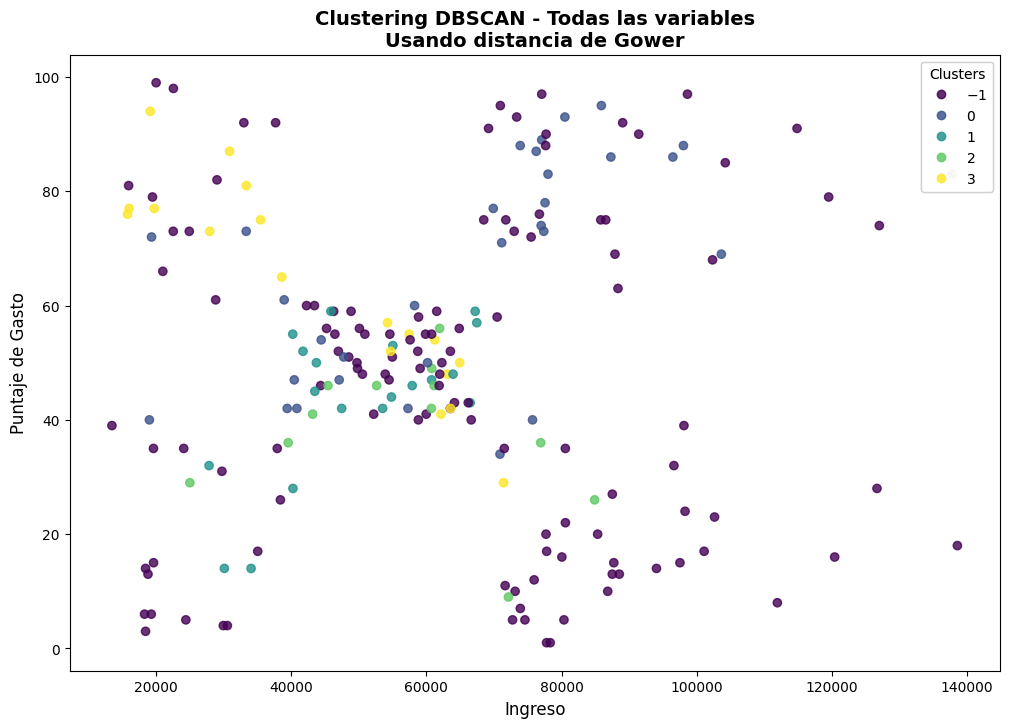

In [262]:
fig, ax = plt.subplots(figsize=(12,8), dpi= 100, facecolor='w', edgecolor='k')
g = plt.scatter(clientes['Ingreso'], clientes['Puntaje_Gasto'], c = clientes['Cluster_all_DBSCAN'], alpha = 0.8)
legend = ax.legend(*g.legend_elements(), loc = "upper right", title = "Clusters")
ax.add_artist(legend)
plt.title('Clustering DBSCAN - Todas las variables\nUsando distancia de Gower', fontsize=14, fontweight='bold')
plt.ylabel('Puntaje de Gasto', fontsize=12)
plt.xlabel('Ingreso', fontsize=12)
plt.show()

#### **Procedimiento**
* Se genera una copia del dataframe original y se eliminan algunas de las columnas que se habian venido usando hasta ahora en los puntos anteriores
* Se escalan las variables para evitar que las variables con valores altos dominen el calculo de la distancia
* Se calcula la matriz de distancia de Gower
* Se exploran multiples valores de k para NearestNeighbors siguiendo la metodologia de Rahmah y Sukaesih para estimar el parametro epsilon.
* Esto se consigue definiendo un ciclo for para distintos valores de k entre 2 y 10
* Se eligen `eps` y `min_samples` quedando todo el proceso debidamente documentado en bloques de texto anteriores.
* Por último se muestran algunos datos estadisticos de los nuevos clusters y se grafica un diagrama de dispersión con las variables `Ingreso` y `Puntuación_Gasto`

#### **Análisis**
* Se consiguen 4 clusters sin embargo estos no son tan sencillos de interpretar
* Ademas el algoritmo interpreta como ruido a la mayoria de los datos (121 de 200)
* Esto no permite hacer una buena identificación de caracteristicas comunes que permitan establecer una estrategia de marketing adecuada.
* Ademas no se identifica ninguna moda en las variables categoricas

#### **Conclusiones**
* Demasiado ruido: 60.5% en Cluster -1 (no segmentable)
* Baja diferenciación: Clusters 1 y 2 muy similares
* Poca representatividad: Clusters muy pequeños (6-9.5%)
* Sin patrón categórico: No se identifican preferencias claras
* No es viable establecer una estrategia de marketing robusta con los clusters actuales debido al alto porcentaje de ruido (60.5%) y la falta de diferenciación clara entre clusters.

In [263]:
import session_info

session_info.show(html=False)

-----
gower               NA
kneed               0.8.5
matplotlib          3.9.4
numpy               2.0.2
pandas              2.3.1
scipy               1.13.1
seaborn             0.13.2
session_info        v1.0.1
sklearn             1.6.1
-----
IPython             8.18.1
jupyter_client      8.6.3
jupyter_core        5.8.1
-----
Python 3.9.13 (tags/v3.9.13:6de2ca5, May 17 2022, 16:36:42) [MSC v.1929 64 bit (AMD64)]
Windows-10-10.0.26100-SP0
-----
Session information updated at 2025-09-01 06:07
